In [ ]:
#
import pandas as pd
csv1=pd.read_csv('placement.csv')
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


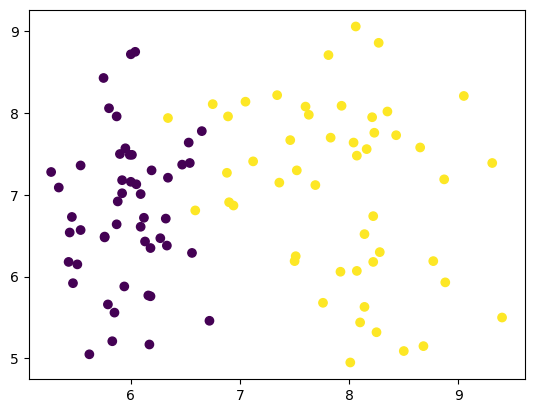

In [ ]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(csv1['cgpa'],csv1['resume_score'],c=csv1['placed'])

In [ ]:

#input-output split
x=csv1.iloc[:,0:2]
x

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [ ]:
#target variable
import pandas as pd
y=csv1.iloc[:,-1]
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1) #10% data for testing . 90% data for training

In [34]:
x_train

,cgpa,resume_score
59,5.95,7.57
11,5.44,6.54
38,6.00,8.72
88,8.07,6.07
61,6.89,7.96
...,...,...
53,6.00,7.16
16,8.04,7.64
5,8.77,6.19
13,8.50,5.09


In [35]:
y_train

59    0
11    0
38    0
88    1
61    1
     ..
53    0
16    1
5     1
13    1
49    0
Name: placed, Length: 90, dtype: int64

In [36]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

x_test

array([[-0.81265958,  0.57262163],
       [-0.74027125,  0.08937775],
       [-0.23355291,  0.86458147],
       [-0.5773975 , -0.45427162],
       [ 0.62605854,  1.1666089 ],
       [ 0.70749542,  0.20012114],
       [-0.77646541,  0.21018872],
       [ 1.60330104, -1.7831923 ],
       [ 2.17335917,  0.47194582],
       [ 1.11467979, -0.40393372]])

In [37]:
#Model Training
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
#Prediction
y_pred = model.predict(x_test)

In [39]:
y_test

68    0
12    0
97    0
26    0
83    1
9     1
23    0
41    1
93    1
0     1
Name: placed, dtype: int64

In [40]:
#evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9

<Axes: >

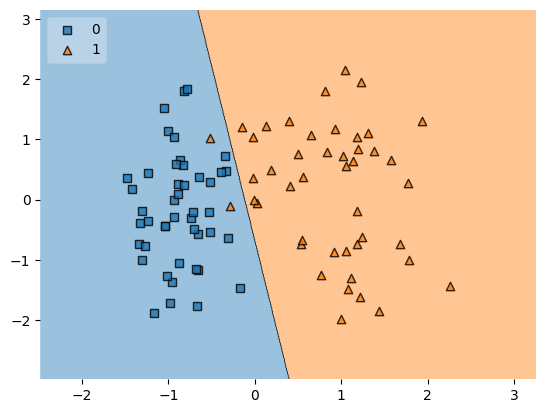

In [ ]:
#plotting decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y=y_train.values, clf=model, legend=2)

In [ ]:
#saving the model
import pickle
pickle.dump(model, open('placement_pickle.pkl','wb'))